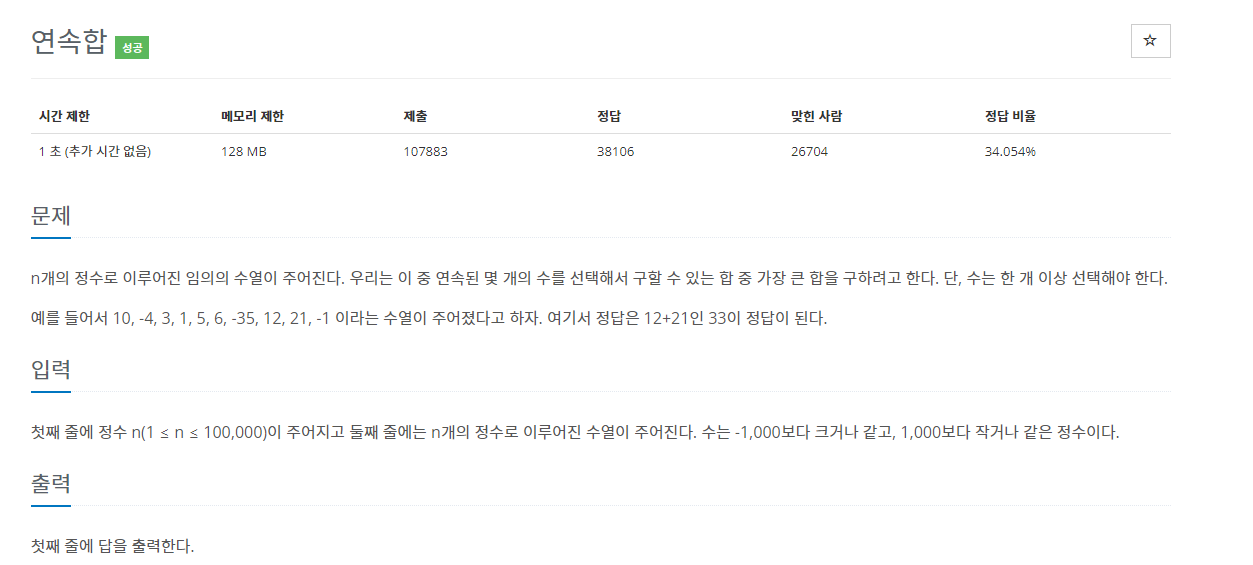

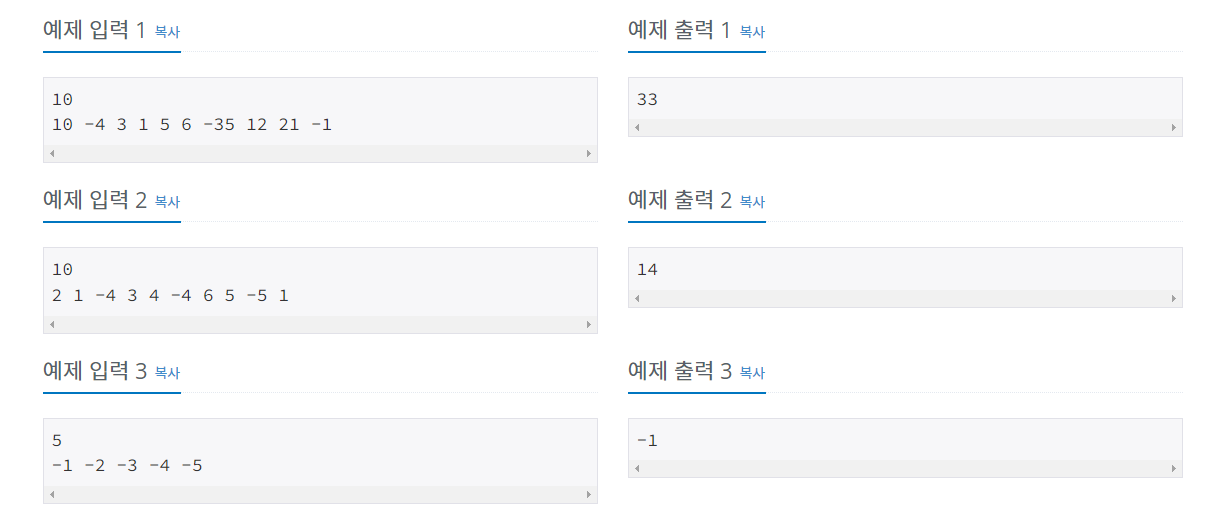

In [1]:
# 굳이 sys.stdin.readline을 사용하지 않았다. (여러 줄 입력이 아니므로)

n = int(input())
a = list(map(int, input().split())) # split()으로 공백 기준으로 입력 문자열을 쪼개기 + map과 int를 이용해 요소들 정수화 + list로 리스트화([])  

for i in range(1,n):
    a[i] = max(a[i], a[i-1]+a[i])
    
print(max(a))

10
10 -4 3 1 5 6 -35 12 21 -1
33


# Dynamic Programming (dp, 동적 계획법)
- 최적화 이론의 한 기술
- 특정 범위까지의 값을 구하기 위해서 그것과 다른 범위까지의 값을 이용하여 효율적으로 값을 구하는 알고리즘 설계 기법
- 분할 정복 알고리즘과 비슷
- 주어진 문제를 나눈다. 나눌 때 부분 문제를 최대한 많이 이용하도록 나눈 다음, 주어진 부분 문제의 정답을 한 번만 계산하고 저장해둔 뒤 다시 한 번 이 부분 문제를 이용할 때는 저장해둔 정답을 바로 산출하여 이용함으로써 속도를 향상시킨다.

# 풀이
1. 이 문제의 핵심은 '연속된 몇 개의 수를 선택해서 구할 수 있는 합 중 가장 큰 합' 일 것이다.
2. 또한, 수는 한 개 이상 선택해야 하므로, 한 개의 가장 큰 수를 선택했을 때가 연속된 몇 개의 수를 선택해서 구할 수 있는 합 중 가장 큰 합(수)이 될 수도 있다.
3. key point: 입력받은 수열의 첫번째(1) 요소부터 마지막 요소까지를 max 함수를 이용해 최신화 시켜준다. 이때 최신화의 기준은 원래의 요소가 더 크냐, 아니면 '이전의 요소와 원래의 요소의 합'이 더 크냐 이다. 이때 더 큰 쪽을 선택하면 된다. '이전의 요소와 원래의 요소의 합'이 더 클수도 있고(이때 최신화가 이루어진다), 원래의 요소가 더 클 수도 있다(이때 최신화가 이루어지지 않고 기존의 요소가 유지된다).
4. 또한, 최신화가 이루어지는 과정에서, 이전에 최신화된 요소를 바로 꺼내 사용하여 속도를 향상한다.
5. 이렇게 최신화 과정을 진행하고 나서 max 함수를 이용해 최신화된 수열의 최댓값을 꺼낸다. 최댓값은 합으로 이루어져있을 수도 있고, 기존의 요소일 수도 있다. 뭐가 되었든 간에, 위 방법을 사용하면 '연속된' 몇 개의 수를 선택해서 구할 수 있는 합 중 가장 큰 합을 구할 수 있는 것이다. 동적 계획법을 통해 최신화된 요소를 바로 꺼내 사용하므로, 일일히 계산을 반복하지 않고 누적합을 사용하게 되며, 자연스레 '연속된' 몇 개의 수를 선택하라는 조건에도 부합되게 된다.
6. 입력받은 수열의 0번째 요소는 최신화 과정을 굳이 거칠 필요가 없다


# 시간복잡도
## => O(n-1)